In [2]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [3]:
from sqlalchemy import create_engine, inspect

In [122]:
import pickle as pkl

In [4]:
from datetime import timedelta

In [5]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.metrics import roc_curve, auc

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn import pipeline, preprocessing

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.metrics import precision_recall_curve

In [15]:
from sklearn.metrics import average_precision_score

In [16]:
from sklearn.metrics import recall_score

In [17]:
df=pd.read_csv('start-up.csv',index_col=0 )

In [18]:
df.columns

Index(['permalink', 'company_name', 'category_code', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at',
       'last_milestone_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'ave_inf_y',
       'adj_base2018', 'sa_raised_amount_usd_adj', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj'],
      dtype='object')

In [19]:
y1,X1=dmatrices('''status ~ category_code  + CA + NY + MA + TX + WA + founded_month 
                + first_funding_dayinop + ave_inf_y 
                + ag_funded_daysop + ag_raised_amount_usd_adj
                + cr_funded_daysop + cr_raised_amount_usd_adj''',data=df,return_type='dataframe')

In [20]:
X1=X1.drop(columns='Intercept')

In [21]:
X1


,category_code[T.analytics],category_code[T.automotive],category_code[T.biotech],category_code[T.cleantech],category_code[T.consulting],category_code[T.design],category_code[T.ecommerce],category_code[T.education],category_code[T.enterprise],category_code[T.fashion],...,MA,TX,WA,founded_month,first_funding_dayinop,ave_inf_y,ag_funded_daysop,ag_raised_amount_usd_adj,cr_funded_daysop,cr_raised_amount_usd_adj
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,29.0,22.191313,0.0,0.00,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,-181.0,21.025859,-181.0,13050.00,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,47.0,21.721111,75.0,667500.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3719.0,16.393939,0.0,0.00,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,122.0,21.721111,122.0,506410.00,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,451.0,19.943636,0.0,0.00,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-194.0,21.025859,0.0,0.00,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,124.0,21.025859,124.0,435000.00,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,245.0,21.721111,245.0,178000.00,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,17.0,20.670404,17.0,42500.00,0.0,0.0


In [22]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8046 entries, 0 to 8047
Data columns (total 52 columns):
category_code[T.analytics]           8046 non-null float64
category_code[T.automotive]          8046 non-null float64
category_code[T.biotech]             8046 non-null float64
category_code[T.cleantech]           8046 non-null float64
category_code[T.consulting]          8046 non-null float64
category_code[T.design]              8046 non-null float64
category_code[T.ecommerce]           8046 non-null float64
category_code[T.education]           8046 non-null float64
category_code[T.enterprise]          8046 non-null float64
category_code[T.fashion]             8046 non-null float64
category_code[T.finance]             8046 non-null float64
category_code[T.games_video]         8046 non-null float64
category_code[T.hardware]            8046 non-null float64
category_code[T.health]              8046 non-null float64
category_code[T.hospitality]         8046 non-null float64
category

In [23]:
y1['status[acquired]'].sum()/len(y1)

0.12341536167039523

In [24]:
y1_ac=y1['status[acquired]']

In [199]:
##logistc regression and auc estimates

X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ac = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
    
log_ac.fit(X1_train,y1_ac_train)
y_score=log_ac.predict_proba(X1_test)[:,1]

fpr1_ac, tpr1_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac = auc(fpr1_ac, tpr1_ac)

y_score1=log_ac.predict_proba(X1_train)[:,1]

fpr1_ac_train, tpr1_ac_train,_ = roc_curve(y1_ac_train, y_score1)
roc_auc1_ac_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac,roc_auc1_ac_train)

0.7424217687074829 0.7593683797682896


In [26]:
y1['status[ipo]'].sum()/len(y1)

0.023738503604275416

In [27]:
y1_ipo=y1['status[ipo]']

In [28]:
## logistic regression or ipo category
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)


tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }

log_ipo = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo.fit(X1_train,y1_ipo_train)
y_score=log_ipo.predict_proba(X1_test)[:,1]

fpr1_ipo, tpr1_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo = auc(fpr1_ipo, tpr1_ipo)

y_score=log_ipo.predict_proba(X1_train)[:,1]

fpr1_ipo_train, tpr1_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_train = auc(fpr1_ipo_train, tpr1_ipo_train)

print(roc_auc1_ipo,roc_auc1_ipo_train)

0.8547372611464968 0.8797125501166975


In [29]:
## logistic regression with normallized variables and calculating AUC

# log_ac_p=pipeline.Pipeline([
#     ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
#     ( 'log', LogisticRegression())
# ])

norm=preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)

X1_train_n=norm.fit_transform(X1_train)

X1_test_n = norm.transform(X1_test)

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }


log_ac_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ac_n.fit(X1_train_n,y1_ac_train)
y_score=log_ac_n.predict_proba(X1_test_n)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac_n = auc(fpr1_ac, tpr1_ac)

y_score=log_ac_n.predict_proba(X1_train_n)[:,1]

fpr1_ac_n_train, tpr1_ac_n_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc1_ac_n_train = auc(fpr1_ac_train, tpr1_ac_train)

print(roc_auc1_ac, roc_auc1_ac_n_train )

0.738360544217687 0.7581206104693786


In [30]:
## logistic regression with normallized variables and calculating AUC

log_ipo_n=GridSearchCV(LogisticRegression(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)

log_ipo_n.fit(X1_train_n,y1_ipo_train)
y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]

fpr1_ipo_n, tpr1_ipo_n,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo_n = auc(fpr1_ipo_n, tpr1_ipo_n)

y_score=log_ipo_n.predict_proba(X1_train_n)[:,1]

fpr1_ipo_n_train, tpr1_ipo_n_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc1_ipo_n_train = auc(fpr1_ipo_n_train, tpr1_ipo_n_train)

print(roc_auc1_ipo_n, roc_auc1_ipo_n_train)

0.8702149681528663 0.8794148793247879


In [31]:
# random forest model for AC
tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}

randomforest_ac =  GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ac.fit(X1_train,y1_ac_train)
y_score=randomforest_ac.predict_proba(X1_test)[:,1]

fpr2_ac, tpr2_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc2_ac = auc(fpr2_ac, tpr2_ac)


y_score=randomforest_ac.predict_proba(X1_train)[:,1]

fpr2_ac_train, tpr2_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc2_ac_train = auc(fpr2_ac_train, tpr2_ac_train)


In [32]:
print(roc_auc2_ac, roc_auc2_ac_train)

0.702202380952381 0.7765492118810772


In [33]:
# random forest model for IPO

tuned_parameters= { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,4,5],
    'criterion' :['gini', 'entropy']
}
randomforest_ipo = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='roc_auc', cv=3, refit=True)
randomforest_ipo.fit(X1_train,y1_ipo_train)

y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    

roc_auc2_ipo, roc_auc2_ipo_train 

(0.8650557324840764, 0.9017707460736432)

In [34]:
# Gradient Boosting Classifier on ipo
learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ipo=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ipo.fit(X1_train,y1_ipo_train)

y_score=GBC_ipo.predict_proba(X1_test)[:,1]
fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)

y_score_train=GBC_ipo.predict_proba(X1_train)[:,1]
fpr3_ipo_train, tpr3_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
roc_auc3_ipo_train = auc(fpr3_ipo_train, tpr3_ipo_train)

 

In [35]:
roc_auc3_ipo, roc_auc3_ipo_train 

(0.8455175159235668, 0.9197221388041537)

In [36]:
# Gradient Boosting Classifier on AC

learning_rates = np.logspace(-4, -0.5, 30)
max_features= range(1,5)
tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
n_folds = 3


GBC_ac=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)


GBC_ac.fit(X1_train,y1_ac_train)

y_score=GBC_ac.predict_proba(X1_test)[:,1]
fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc3_ac = auc(fpr3_ac, tpr3_ac)

y_score_train=GBC_ac.predict_proba(X1_train)[:,1]
fpr3_ac_train, tpr3_ac_train,_ = roc_curve(y1_ac_train, y_score_train)
roc_auc3_ac_train = auc(fpr3_ac_train, tpr3_ac_train)

roc_auc3_ac, roc_auc3_ac_train 

(0.7294472789115647, 0.8240221684075115)

In [37]:
#Support vector machine on IPO

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]


SVC1_ipo=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ipo.fit(X1_train_n,y1_ipo_train)

y_score=SVC1_ipo.predict_proba(X1_test_n)[:,1]
fpr4_ipo, tpr4_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc4_ipo = auc(fpr4_ipo, tpr4_ipo)

y_score=SVC1_ipo.predict_proba(X1_train_n)[:,1]
fpr4_ipo_train, tpr4_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc4_ipo_train = auc(fpr4_ipo_train, tpr4_ipo_train)

roc_auc4_ipo, roc_auc4_ipo_train

(0.7435191082802547, 0.8151759418778022)

In [38]:
#Support vector machine on ac

tuned_parameters = [
  {'C': [1, 10, 50], 'kernel': ['linear'],'probability':[True]},
  {'C': [1, 10, 50], 'gamma': [0.001, 0.0001,0.01], 'kernel': ['rbf'],'probability':[True]},
 ]

SVC1_ac=GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

SVC1_ac.fit(X1_train_n,y1_ac_train)

y_score=SVC1_ac.predict_proba(X1_test_n)[:,1]
fpr4_ac, tpr4_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc4_ac = auc(fpr4_ac, tpr4_ac)

y_score=SVC1_ac.predict_proba(X1_train_n)[:,1]
fpr4_ac_train, tpr4_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc4_ac_train = auc(fpr4_ac_train, tpr4_ac_train)

roc_auc4_ac, roc_auc4_ac_train

(0.6566598639455783, 0.6826087663757013)

In [39]:
#Naive-Bayes on IPO, it does not have hyperparameters 
bayes_ipo = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ipo.fit(X1_train,y1_ipo_train)

y_score=bayes_ipo.predict_proba(X1_test)[:,1]
fpr6_ipo, tpr6_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc6_ipo = auc(fpr6_ipo, tpr6_ipo)

y_score=bayes_ipo.predict_proba(X1_train)[:,1]
fpr6_ipo_train, tpr6_ipo_train,_ = roc_curve(y1_ipo_train, y_score)
roc_auc6_ipo_train = auc(fpr6_ipo_train, tpr6_ipo_train)

roc_auc6_ipo, roc_auc6_ipo_train

(0.8579299363057324, 0.8252029693320058)

In [40]:
#Naive-Bayes on ac, it does not have hyperparameters 
bayes_ac = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian

bayes_ac.fit(X1_train,y1_ac_train)

y_score=bayes_ac.predict_proba(X1_test)[:,1]
fpr6_ac, tpr6_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc6_ac = auc(fpr6_ac, tpr6_ac)

y_score=bayes_ac.predict_proba(X1_train)[:,1]
fpr6_ac_train, tpr6_ac_train,_ = roc_curve(y1_ac_train, y_score)
roc_auc6_ac_train = auc(fpr6_ac_train, tpr6_ac_train)

In [41]:
def cv_Bayes(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    
    bayes = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian
   
    bayes.fit(X1_train,y1_ipo_train)

    y_score=bayes.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=bayes.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)

    
    return roc_auc2_ipo,roc_auc2_ipo_train,bayes,X1_train,X1_test, y1_ipo_train, y1_ipo_test

In [42]:
def Bayes_afew_times(X1, y1_ipo, n=10):
    info= (pd.DataFrame([cv_Bayes(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test']))
    
#         (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
#                          columns=['Test auc','Train auc'])).mean()
                         
                         
    return info

In [43]:
info_b_ipo=Bayes_afew_times(X1, y1_ipo,n=10)

In [44]:
np.mean(info_b_ipo['Train auc'])

0.8321266484032825

In [45]:
np.mean(info_b_ipo['Test auc'])

0.8287826631223888

In [46]:
info_b_ac=Bayes_afew_times(X1, y1_ac,n=10)

In [47]:
info_b_ac

,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.621309,0.587441,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,5314 1.0 2562 0.0 7655 0.0 6662 0....,674 0.0 1090 0.0 4024 0.0 3074 0....
1,0.587513,0.591699,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,12 0.0 5308 0.0 3058 0.0 3786 1....,1833 0.0 6597 0.0 359 0.0 4627 1....
2,0.574507,0.592523,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,7170 0.0 7769 1.0 5288 0.0 3606 0....,738 1.0 6547 0.0 712 0.0 5251 1....
3,0.542164,0.602968,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2722 0.0 7692 0.0 6487 0.0 1627 0....,1006 0.0 6404 0.0 6160 0.0 3405 0....
4,0.590904,0.593500,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,5273 0.0 453 0.0 5556 0.0 3475 1....,1377 0.0 3461 0.0 1336 0.0 5604 0....
5,0.560104,0.602630,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,7307 1.0 6234 0.0 7623 0.0 3558 0....,332 0.0 3503 0.0 6054 1.0 6243 1....
6,0.568724,0.595000,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,6751 0.0 6745 0.0 2271 0.0 1771 0....,6985 0.0 2706 0.0 4905 0.0 5888 0....
7,0.554021,0.596389,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,7478 0.0 19 0.0 174 0.0 3278 0....,953 0.0 847 0.0 4370 0.0 7469 0....
8,0.550943,0.590317,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,5735 0.0 2954 0.0 2313 1.0 587 0....,5595 0.0 2875 0.0 3073 0.0 93 0....
9,0.551891,0.597060,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,6078 0.0 417 0.0 4883 1.0 1647 0....,4599 0.0 5379 0.0 1988 0.0 4000 0....


In [48]:
np.mean(info_b_ac['Train auc'])

0.5949527842643721

In [49]:
np.mean(info_b_ac['Test auc'])

0.5702080138040901

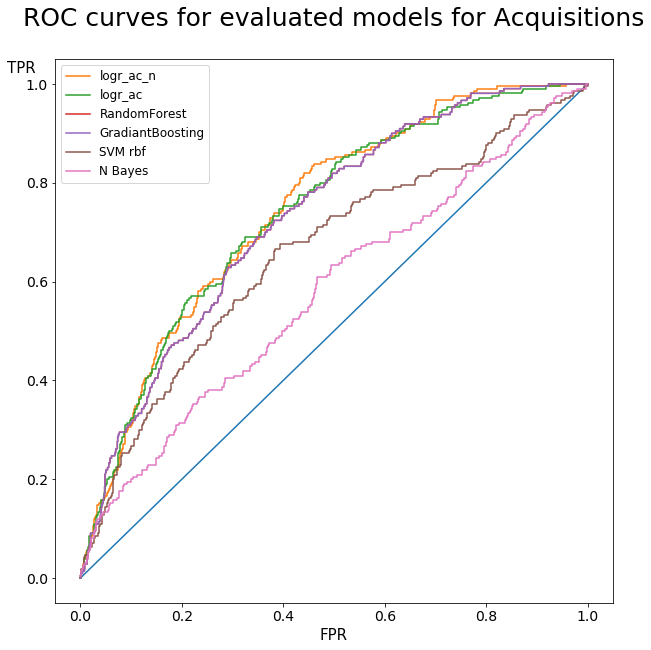

In [50]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='logr_ac_n')
plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.plot(fpr3_ac,tpr3_ac,label='RandomForest')
plt.plot(fpr3_ac,tpr3_ac,label='GradiantBoosting')
plt.plot(fpr4_ac,tpr4_ac,label='SVM rbf')
plt.plot(fpr6_ac,tpr6_ac,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for Acquisitions", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);


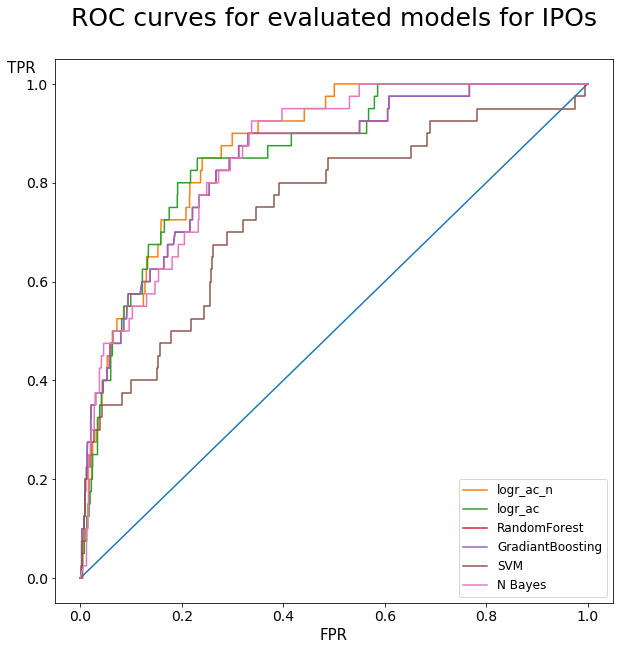

In [51]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='logr_ac_n')
plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ac')
plt.plot(fpr3_ipo,tpr3_ipo,label='RandomForest')
plt.plot(fpr3_ipo,tpr3_ipo,label='GradiantBoosting')
plt.plot(fpr4_ipo,tpr4_ipo,label='SVM')
plt.plot(fpr6_ipo,tpr6_ipo,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for IPOs", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);

In [52]:
Name=['logr', 'logr_n','RandomForest', 'GradiantBoosting','SVM','N Bayes']

In [53]:
Model_ac=[log_ac,log_ac_n,randomforest_ac,GBC_ac,SVC1_ac,bayes_ac]

In [54]:
Model_ipo=[log_ipo,log_ipo_n,randomforest_ipo,GBC_ipo,SVC1_ipo,bayes_ipo]

In [55]:
auc_test_ac=[roc_auc1_ac,roc_auc1_ac_n, roc_auc2_ac,roc_auc3_ac,roc_auc4_ac, roc_auc6_ac]

In [56]:
auc_train_ac=[roc_auc1_ac_train, roc_auc1_ac_n_train, roc_auc2_ac_train,roc_auc3_ac_train,roc_auc4_ac_train, roc_auc6_ac_train]

In [57]:
auc_test_ipo=[roc_auc1_ipo,roc_auc1_ipo_n, roc_auc2_ipo,roc_auc3_ipo,roc_auc4_ipo, roc_auc6_ipo]

In [58]:
auc_train_ipo=[roc_auc1_ipo_train,roc_auc1_ipo_n_train, roc_auc2_ipo_train,roc_auc3_ipo_train,roc_auc4_ipo_train, roc_auc6_ipo_train]

In [59]:
fpr_ipo =[fpr1_ipo,fpr1_ipo_n,fpr2_ipo,fpr3_ipo,fpr4_ipo,fpr6_ipo]

In [60]:
fpr_ac =[fpr1_ac,fpr1_ac_n,fpr2_ac,fpr3_ac,fpr4_ac,fpr6_ac]

In [61]:
tpr_ac =[tpr1_ac,tpr1_ac_n,tpr2_ac,tpr3_ac,tpr4_ac,tpr6_ac]

In [62]:
tpr_ipo =[tpr1_ipo,tpr1_ipo_n,tpr2_ipo,tpr3_ipo,tpr4_ipo,tpr6_ipo]

In [63]:
fpr_ipo_train =[fpr1_ipo_train,fpr1_ipo_n_train,fpr2_ipo_train,fpr3_ipo_train,fpr4_ipo_train,fpr6_ipo_train]

In [64]:
fpr_ac_train =[fpr1_ac_train,fpr1_ac_n_train,fpr2_ac_train,fpr3_ac_train,fpr4_ac_train,fpr6_ac_train]

In [65]:
tpr_ipo_train =[tpr1_ipo_train,tpr1_ipo_n_train,tpr2_ipo_train,tpr3_ipo_train,tpr4_ipo_train,tpr6_ipo_train]

In [66]:
tpr_ac_train =[tpr1_ac_train,tpr1_ac_n_train,tpr2_ac_train,tpr3_ac_train,tpr4_ac_train,tpr6_ac_train]

In [67]:
Model_data_ac=pd.DataFrame({'name':Name, 'model':Model_ac,'auc_test_ac':auc_test_ac,
                            'auc_train_ac':auc_train_ac })

In [68]:
Model_data_ipo=pd.DataFrame({'name':Name, 'model':Model_ipo,'auc_test_ipo':auc_test_ipo,
                            'auc_train_ipo':auc_train_ipo})

In [69]:
Model_data_ac

,name,model,auc_test_ac,auc_train_ac
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.738361,0.758121
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.738361,0.758121
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.702202,0.776549
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.729447,0.824022
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.656660,0.682609
5,N Bayes,GaussianNB(priors=None),0.577527,0.604856


In [70]:
Model_data_ipo

,name,model,auc_test_ipo,auc_train_ipo
0,logr,"GridSearchCV(cv=3, error_score='raise',\n ...",0.854737,0.879713
1,logr_n,"GridSearchCV(cv=3, error_score='raise',\n ...",0.870215,0.879415
2,RandomForest,"GridSearchCV(cv=3, error_score='raise',\n ...",0.865056,0.901771
3,GradiantBoosting,"GridSearchCV(cv=3, error_score='raise',\n ...",0.845518,0.919722
4,SVM,"GridSearchCV(cv=3, error_score='raise',\n ...",0.743519,0.815176
5,N Bayes,GaussianNB(priors=None),0.857930,0.825203


In [120]:
Model_data_ac[['name','auc_test_ac','auc_train_ac']]

,name,auc_test_ac,auc_train_ac
0,logr,0.738361,0.758121
1,logr_n,0.738361,0.758121
2,RandomForest,0.702202,0.776549
3,GradiantBoosting,0.729447,0.824022
4,SVM,0.656660,0.682609
5,N Bayes,0.577527,0.604856


In [71]:
log_ac_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.01308576, 0.01492127, 0.01240603, 0.02294993, 0.03449504,
        0.03767093, 0.04094291, 0.06430181, 0.05107371, 0.10058546,
        0.13652277, 0.11405897, 0.29890426, 0.14073062]),
 'std_fit_time': array([0.0015161 , 0.00236282, 0.00225857, 0.00162555, 0.00074693,
        0.00389506, 0.00104755, 0.01871216, 0.00190445, 0.01291315,
        0.00705462, 0.02133373, 0.11878917, 0.02737895]),
 'mean_score_time': array([0.00167664, 0.00184345, 0.0016427 , 0.00154479, 0.00144267,
        0.00160384, 0.00132895, 0.00192396, 0.00195694, 0.00166424,
        0.00183256, 0.00131901, 0.0014348 , 0.00142169]),
 'std_score_time': array([5.80415274e-05, 1.61689755e-04, 1.59868265e-04, 7.68110842e-05,
        1.59873124e-04, 1.96332259e-04, 2.07492664e-05, 3.68294553e-04,
        3.38854679e-04, 2.40331473e-04, 4.78414840e-04, 1.52293723e-05,
        8.88673605e-05, 4.00547943e-05]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [72]:
GBC_ac.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.34846052, 0.3547198 , 0.39164567, 0.42735465, 0.33311097,
        0.39157971, 0.396427  , 0.42981442, 0.31636874, 0.3587896 ,
        0.39254959, 0.43039211, 0.321299  , 0.40372356, 0.39839292,
        0.42837842, 0.31946762, 0.36078262, 0.39904277, 0.42947499,
        0.31733211, 0.35582368, 0.39354078, 0.43201009, 0.32522869,
        0.36404816, 0.39539099, 0.42952363, 0.32805888, 0.3824714 ,
        0.98968267, 2.22717945, 0.34283058, 0.36503752, 0.40270599,
        0.44053133, 0.3299497 , 0.36639198, 0.41764228, 0.43445969,
        0.38401373, 0.44935799, 0.49260434, 0.54119587, 0.34863798,
        0.39130704, 0.44485092, 0.50000858, 0.43898431, 0.48594562,
        0.52249599, 0.52689187, 0.36430868, 0.38750863, 0.41983883,
        0.46673997, 0.34938327, 0.38279263, 0.42710924, 0.47143666,
        0.3466533 , 0.36800528, 0.39992507, 0.443211  , 0.34017507,
        0.38524445, 0.42136995, 0.45758851, 0.35193006, 0.38279764,
        0.41875132, 0.45933668,

In [73]:
log_ipo_n.cv_results_ 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00889826, 0.01511725, 0.01365304, 0.02021035, 0.02895077,
        0.02973088, 0.06081637, 0.05476769, 0.09962837, 0.09496697,
        0.23708868, 0.12671232, 0.64103405, 0.16985957]),
 'std_fit_time': array([0.00121925, 0.00288279, 0.00035308, 0.00144787, 0.00192668,
        0.0016468 , 0.0025921 , 0.00325923, 0.01619948, 0.00364569,
        0.08998406, 0.01412521, 0.29480829, 0.03308851]),
 'mean_score_time': array([0.00128444, 0.00174697, 0.00167704, 0.00153232, 0.00132402,
        0.00131671, 0.00133371, 0.00148733, 0.00164048, 0.00205843,
        0.00208624, 0.00182263, 0.00178305, 0.00154869]),
 'std_score_time': array([2.50566949e-04, 1.93416630e-04, 2.00946650e-04, 2.77910852e-04,
        9.22227664e-06, 4.40093115e-05, 4.81538642e-05, 2.22615921e-04,
        3.28215733e-04, 2.82506757e-04, 6.50288101e-05, 2.67584139e-04,
        5.09159695e-04, 8.47164283e-05]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [134]:
recall_score_ac_n=[]
precision_score_ac_n=[]
f1_score_ac=[]
for i in np.linspace(0,1,100):
    y_score=log_ac_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ac_n.append(metrics.precision_score(y1_ac_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ac_n.append(metrics.recall_score(y1_ac_test, y_score))
    f1_score_ac.append(metrics.f1_score(y1_ac_test, y_score))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: P

In [170]:
ind=np.argmax(f1_score_ac)
list(np.linspace(0,1,100))[ind]

0.17171717171717174

In [171]:
f1_score_ac[ind]


0.375

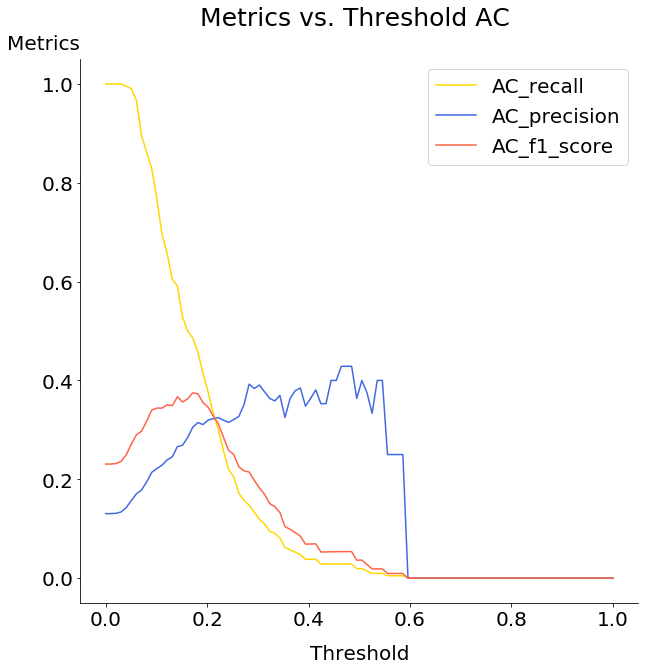

In [192]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ac_n
y2=precision_score_ac_n
y3=f1_score_ac

ttl = ax.title
ttl.set_position([.5, 1.05])
plt.plot(x,y,label='AC_recall',color='gold')
plt.plot(x,y2,label='AC_precision',color='royalblue')
plt.plot(x,y3,label='AC_f1_score',color='tomato')
#plt.axvline(0.215, color='gold', linestyle='solid')
plt.title("Metrics vs. Threshold AC \n", size = 25)

plt.xlabel('Threshold', size = 20, labelpad = 15)
plt.ylabel('Metrics \n ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()
plt.legend(loc='best',prop={'size': 20});



In [173]:
y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >0.17171717171717174
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test, y_ac_predlogn)
cm_ac_logn

array([[1168,  232],
       [ 108,  102]])

In [174]:
print(classification_report(y1_ac_test, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.92      0.83      0.87      1400
        1.0       0.31      0.49      0.38       210

avg / total       0.84      0.79      0.81      1610



In [175]:
recall_score_ipo_n=[]
precision_score_ipo_n=[]
f1_score_ipo=[]

for i in np.linspace(0,1,100):
    y_score=log_ipo_n.predict_proba(X1_test_n)[:,1]>i
#     sklearn.metrics.recall_score(y1_ac_test, y_pred)#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    
    precision_score_ipo_n.append(metrics.precision_score(y1_ipo_test, y_score))#, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    recall_score_ipo_n.append(metrics.recall_score(y1_ipo_test, y_score))
    f1_score_ipo.append(metrics.f1_score(y1_ipo_test, y_score))


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: P

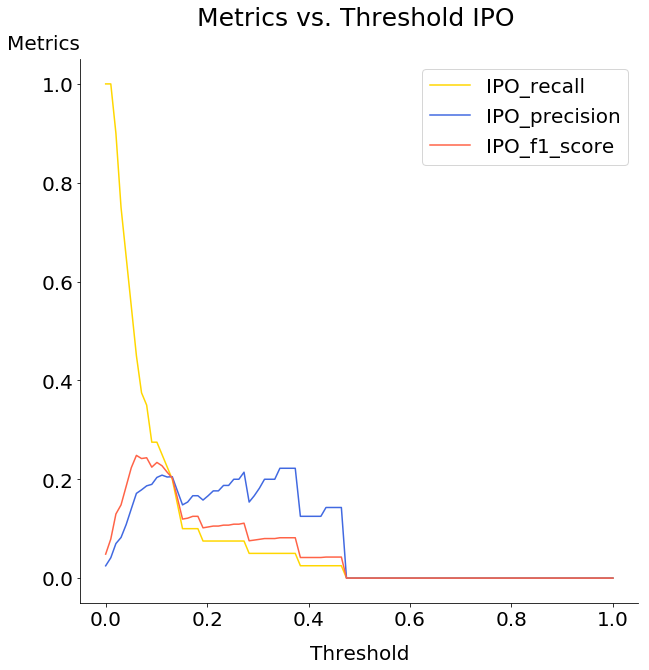

In [191]:
plt.figure(figsize= [10,10])
x=np.linspace(0,1,100)
y=recall_score_ipo_n
y2=precision_score_ipo_n
y3=f1_score_ipo
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.plot(x,y,label='IPO_recall',color='gold')
plt.plot(x,y2,label='IPO_precision',color='royalblue')
plt.plot(x,y3,label='IPO_f1_score',color='tomato')
plt.title("Metrics vs. Threshold IPO \n", size = 25)
plt.xlabel('Threshold', size = 20, labelpad = 15)
plt.ylabel('Metrics \n', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()
plt.legend(loc='best',prop={'size': 20});

In [177]:
ind=np.argmax(f1_score_ipo)
list(np.linspace(0,1,100))[ind]

0.06060606060606061

In [181]:
ind

6

In [178]:
f1_score_ipo[ind]

0.24827586206896554

In [183]:
y_ipo_predlogn=log_ipo_n.predict_proba(X1_test_n)[:,1] >0.06060606060606061
# y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1] >x[np.argmax(roc_auc_ac_n)]

cm_ipo_logn=confusion_matrix(y1_ipo_test, y_ipo_predlogn)
cm_ipo_logn

array([[1483,   87],
       [  22,   18]])

In [184]:
print(classification_report(y1_ipo_test, y_ipo_predlogn))

             precision    recall  f1-score   support

        0.0       0.99      0.94      0.96      1570
        1.0       0.17      0.45      0.25        40

avg / total       0.97      0.93      0.95      1610



In [185]:
log_ac_n.best_estimator_.coef_

array([[-0.02246158,  0.        , -0.09411358, -0.04704556, -0.0345704 ,
        -0.00685646, -0.07962492, -0.01121914,  0.04011759,  0.00604768,
        -0.01443832,  0.00127353, -0.00874315, -0.03868529, -0.02555847,
        -0.02604049, -0.00481392, -0.07093195, -0.10546583,  0.03530798,
         0.08988425,  0.01770622, -0.06540563,  0.05018417,  0.        ,
        -0.06521388, -0.01894491, -0.00928592,  0.        ,  0.        ,
        -0.03016721,  0.        ,  0.02387176,  0.01155115, -0.00278203,
         0.        , -0.02017521,  0.        ,  0.02801782,  0.16581003,
         0.20135838,  0.11486936,  0.07158899,  0.01751394,  0.06698122,
         0.00842338, -0.959864  , -1.23521933, -0.04340035,  0.        ,
         0.        ,  0.        ]])

In [186]:
len(X1.columns)

52

In [187]:
names = X1.columns
coefs = log_ac_n.best_estimator_.coef_[0]
coef=pd.DataFrame({'names':names,'coefs':coefs })

In [188]:
coef['abscoef']=abs(coef['coefs'])

coef=coef.sort_values(by='abscoef',ascending=False)
coef

,names,coefs,abscoef
47,ave_inf_y,-1.235219,1.235219
46,first_funding_dayinop,-0.959864,0.959864
40,CA,0.201358,0.201358
39,category_code[T.web],0.165810,0.165810
41,NY,0.114869,0.114869
18,category_code[T.medical],-0.105466,0.105466
2,category_code[T.biotech],-0.094114,0.094114
20,category_code[T.mobile],0.089884,0.089884
6,category_code[T.ecommerce],-0.079625,0.079625
42,MA,0.071589,0.071589


In [189]:
coef2=coef.iloc[:45]
coef2

,names,coefs,abscoef
47,ave_inf_y,-1.235219,1.235219
46,first_funding_dayinop,-0.959864,0.959864
40,CA,0.201358,0.201358
39,category_code[T.web],0.165810,0.165810
41,NY,0.114869,0.114869
18,category_code[T.medical],-0.105466,0.105466
2,category_code[T.biotech],-0.094114,0.094114
20,category_code[T.mobile],0.089884,0.089884
6,category_code[T.ecommerce],-0.079625,0.079625
42,MA,0.071589,0.071589


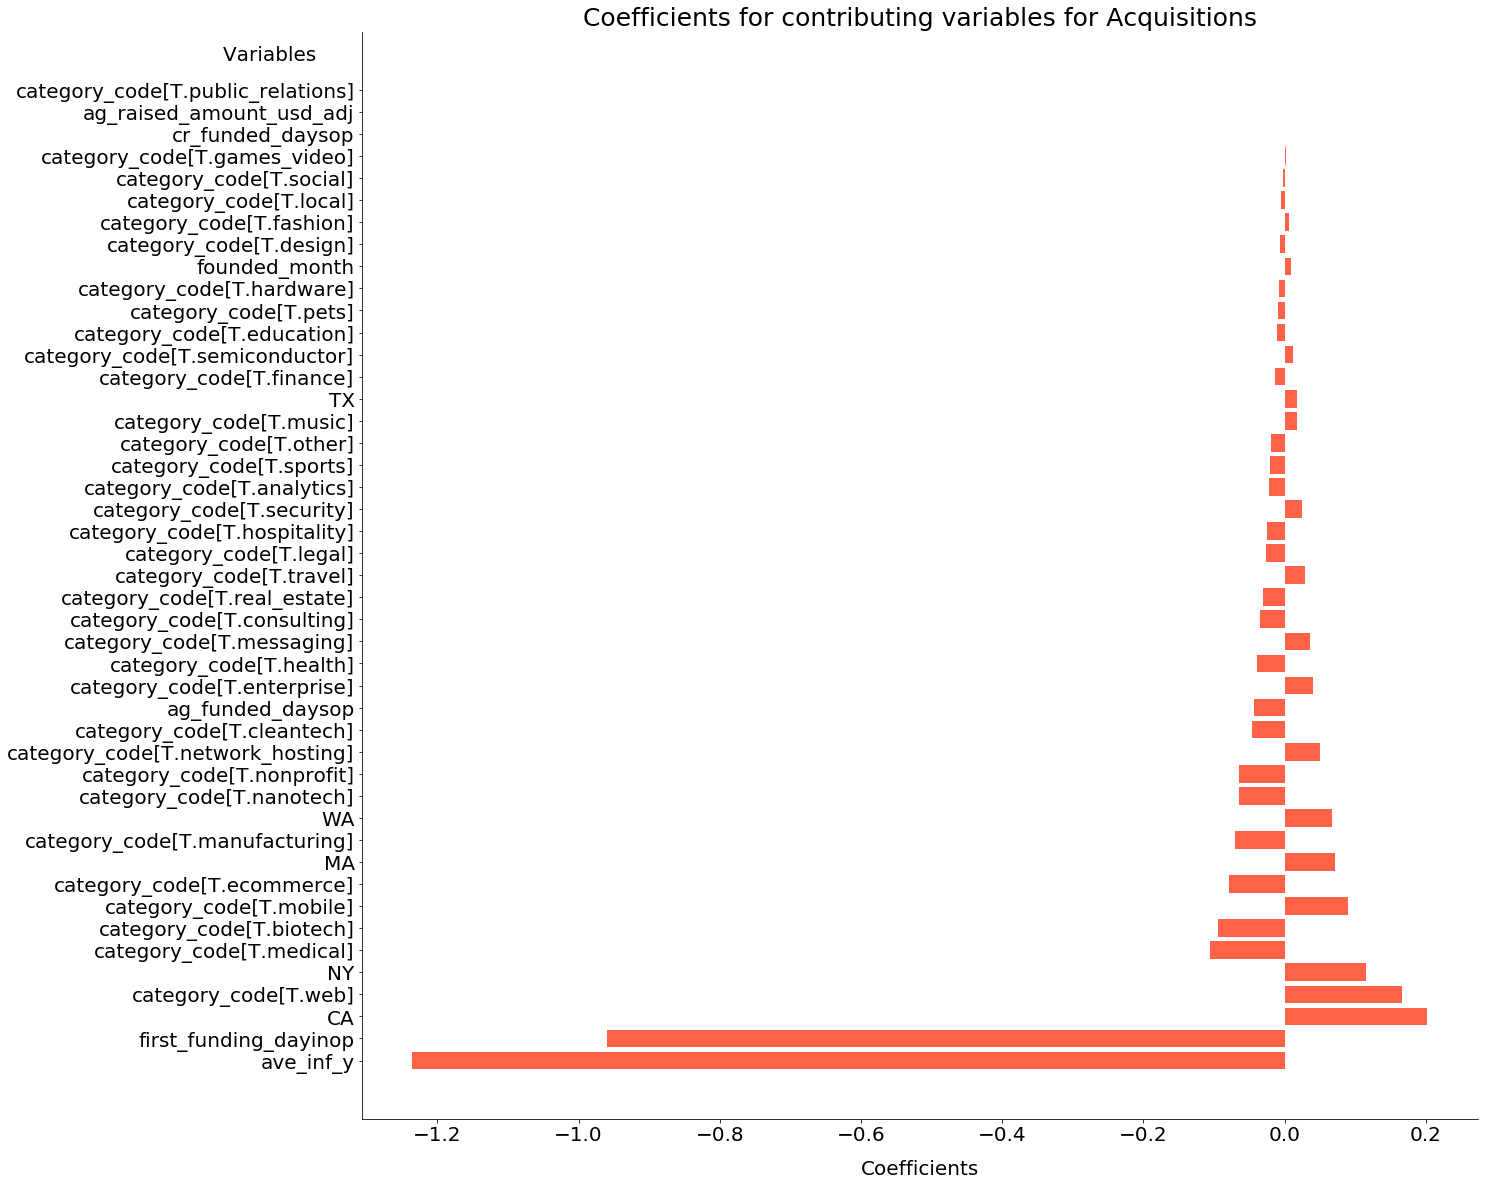

In [193]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef2))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef2['coefs'],color='tomato')
plt.yticks(crange, coef2['names'])
ax = plt.gca()
# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Coefficients for contributing variables for Acquisitions", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()

In [194]:
names = X1.columns
coefs = log_ipo_n.best_estimator_.coef_[0]
coef=pd.DataFrame({'names':names,'coefs':coefs })

In [195]:
coef['abscoef']=abs(coef['coefs'])

coef=coef.sort_values(by='abscoef',ascending=False)
coef

,names,coefs,abscoef
47,ave_inf_y,-0.902292,0.902292
2,category_code[T.biotech],0.257937,0.257937
49,ag_raised_amount_usd_adj,-0.242618,0.242618
46,first_funding_dayinop,-0.217001,0.217001
41,NY,-0.094700,0.094700
23,category_code[T.network_hosting],0.092524,0.092524
3,category_code[T.cleantech],0.073531,0.073531
11,category_code[T.games_video],-0.067658,0.067658
32,category_code[T.security],0.053624,0.053624
35,category_code[T.software],-0.049552,0.049552


In [197]:
coef2=coef.iloc[:18]
coef2

,names,coefs,abscoef
47,ave_inf_y,-0.902292,0.902292
2,category_code[T.biotech],0.257937,0.257937
49,ag_raised_amount_usd_adj,-0.242618,0.242618
46,first_funding_dayinop,-0.217001,0.217001
41,NY,-0.094700,0.094700
23,category_code[T.network_hosting],0.092524,0.092524
3,category_code[T.cleantech],0.073531,0.073531
11,category_code[T.games_video],-0.067658,0.067658
32,category_code[T.security],0.053624,0.053624
35,category_code[T.software],-0.049552,0.049552


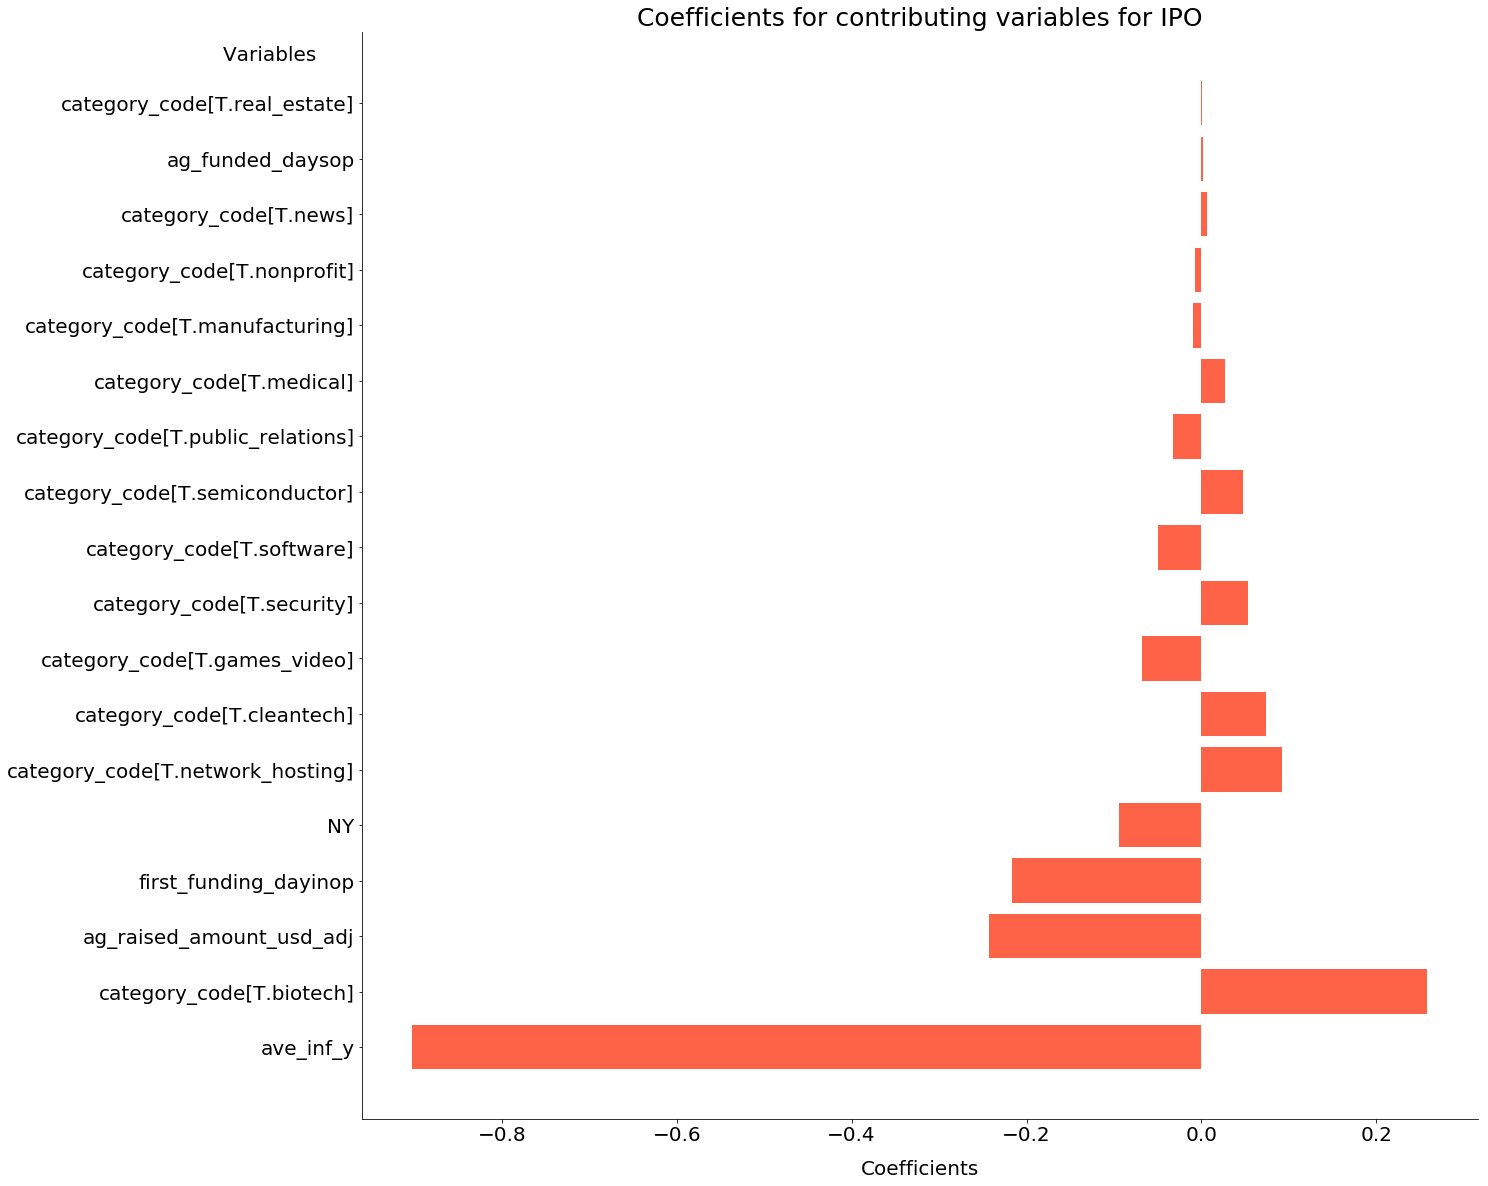

In [198]:
plt.figure(figsize= [20,20])
crange = np.arange(len(coef2))
# # print(crange.shape, coefs.shape)
plt.barh(crange, coef2['coefs'],color='tomato')
plt.yticks(crange, coef2['names'])
ax = plt.gca()
# plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Coefficients for contributing variables for IPO", size = 25)
plt.xlabel('Coefficients', size = 20, labelpad = 15)
plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=20)
plt.yticks(size=20)
ax.yaxis.set_label_coords(-0.06,0.97)
sns.despine()

In [127]:
pickle.dump(Model_data_ac, open("Model_data_ac_wo_sa.pickle", "wb"))

In [128]:
pickle.dump(Model_data_ipo, open("Model_data_ipo_wo_sa.pickle", "wb"))

In [129]:
Model_data_ac.to_csv('Model_data_ac_wo_sa.csv')

In [130]:
Model_data_ipo.to_csv('Model_data_ipo_wo_sa.csv')